In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lu_tridiagonal(c, d, e, b):
    n = len(d)

    for k in range(1, n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam

    for k in range(1, n):
        b[k] = b[k] - c[k-1]*b[k-1]

    b[n-1] = b[n-1]/d[n-1]

    for k in range(n-2, -1, -1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b

[90. 90. 90. 90. 90. 90. 90. 90.]
[-199. -199. -199. -199. -199. -199. -199. -199. -199.]
[110. 110. 110. 110. 110. 110. 110. 110.]
[ -90.    0.    0.    0.    0.    0.    0.    0. -330.]
[1.         1.55381858 1.99281724 2.33388145 2.59171688 2.77911207
 2.90717076 2.98551722 3.02247781 3.02524122 3.        ]


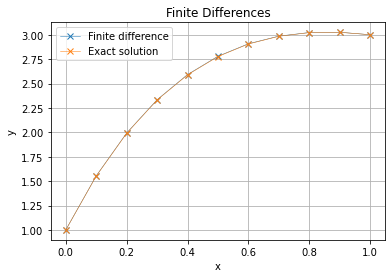

In [7]:
def diferencias_finitas(a, b, alpha, beta, p, q, r, n):
    h = (b - a)/(n + 1)
    x = np. linspace(a, b, n + 2)
    y = np.zeros(n + 2)

    y[0] = alpha
    y[n + 1] = beta

    p = np.array([p(i) for i in x])
    q = np.array([q(i) for i in x])
    
    b = np.zeros(n)
    b[0] = r(x[1]) - alpha*(1/h**2 + p[1]/(2*h))
    b[1:n-1] = [r(i) for i in x[2:n]]
    b[n-1] = r(x[n]) - beta*(1/h**2 - p[1]/(2*h))

    c = 1/h**2 + p[2:n + 1]/(2*h)
    d = -2/h**2 - q[1:n + 1]
    e = 1/h**2 - p[1:n]/(2*h)

    print(c, d, e, b, sep='\n')
    y = lu_tridiagonal(c, d, e, b)
    return x, y

a, b = 0, 1
alpha = 1
beta = 3
h = 0.1
n = 9

def p(x):
    return -2

def q(x):
    return -1

def r(x):
    return 0

x, y  = diferencias_finitas(a, b, alpha, beta, p, q, r, n)
y = np.insert(y, 0, alpha, axis=0)
y = np.append(y, beta)
print(y)

plt.plot(x, y, marker='x', linewidth=0.5)
plt.plot(x, [np.e**(-i) + (3*np.e - 1)*i*np.e**(-i) for i in x], marker='x', linewidth=0.5)
plt.legend(("Finite difference", "Exact solution"))
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Finite Differences")
plt.show()